Please fill in your name and that of your teammate.

You: Amine CHARFEDDINE

Teammate: Delil DAG

# Introduction

Welcome to the fifth lab. Last week we had a break from math-heavy assignments to allow you to catch up on the fundamentals and tools seen so far. Well, as far as learning Pandas could be considered a break, anyway. We will learn more of this library over the following weeks, I hope you will develop an appreciation for its use over time.  
_"You may find its methods disagreeable, but you can't avoid appreciating the results"_ (cit.)

Spoiler alert: I lied last week, actually IMO Pandas' most confusing feature is `groupby()` :) but you got `loc` and `iloc` already in your pocket now, right?

## Grouping in Pandas

It is time to introduce some of the math applications of Pandas DataFrame and Series, and to the unfriendly-but-oh-so-useful `groupby()`.

From now on we will be using Pandas containers for our data, even directly for the math calculation. Remember that they wrap around Numpy arrays (and you know how to use those now) while giving convenient indexing and extra capabilities. No need to e.g. split the points based on their class into a `dict` as we did for LDA: we can simply _group_ data by label, then all operations will work on the whole feature arrays, and run for all classes at once (and using the underlying, faster C implementation).

Main hint: simply treat a DataFrame just like you would a multi-dimensional Numpy array. Just think of it as a matrix, as you already had, generalized to higher dimensions: a **tensor**. A Pandas Series on the other hand is just a one-dimensional Numpy array (vector). In either case, function calls will be _broadcasted_ to its elements: this means that they will run independently on each element and their results will be aggregated back in a data structure of the same type (list, Series or DataFrame).

We will use `groupby()` extensively from today: typically it takes a while to grasp first, but your code will be legible, and you will need (almost) no more `for` loops nor `dict`s.  
Careful though because the method returns a special [`GroupBy` object](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html), that is somehow unwieldy: **it removes a feature, adds a dimension (the grouping), and does not print directly from its output**. Read this last sentence a couple of times, then again _after_ you start playing around with `groupby()` (seriously, write it on a post-it or something), and it will help to slowly make sense of this.

Initially, try to follow each call to `groupby()` with a `describe()`, to really see what is happening. Also `print` the `groups` for an intuition on how the grouping works: it's basically a `dict` from each element of the "group" (e.g. the classes) to the `Index` values of the corresponding rows. With LDA we already did something similar, by hand, with a `dict` hashing the classes to the actual data (less efficient than using indices).  

A `GroupBy` object is just an implicit (because performance) description on how to split/group the data: any operation you call on it will return multiple results, _one per group_, instead of just one value. This is a sort of "automated mapping", aka [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). Go ahead and play with it a bit: understanding this point is necessary to solve the next questions.  
The trick that did it for me, was to try and ignore its output *per se* (I don't even print it), imagine it's just a fancy version of LDA's per-class `dict` we built by hand, and just call functions on the output since _their_ output makes sense again for me.

From this point on, it is important that you need to start thinking of the dataset as a whole, single, high-dimensional entity, not just a list of points. It's a forest, not trees. Explore it by selecting and slicing this object from different perspectives, as if you were "floating around it in space" rather than being stuck to "read one row at a time". When you use a DataFrame for math, just remember that you are manipulating multiple variables at the same time, and you will get vectorial answers: treat it like a special Numpy data structure, and everything should eventually become intuitive.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 12 points (out of 18 available) to pass** (66%).

In [1]:
# Let me hit ctrl+c ctrl+v for you one last time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# 1. Fundamentals

This time we start strong with an example that is simple but longer. Take your time to read and understand each part, follow the suggestions, and it should unravel without much trouble.

#### 1.1 **[4pt]** You want to calculate the reliability of a weather forecast service. In the current season, you get rain on 25% of the days. You know that 10% of the time they forecast rain and it does not rain. You also know that 5% of the time they forecast good weather and they are wrong. Using Bayes' rule, calculate by hand the probability that one day it is going to rain given that they earlier forecasted rain.

I suggest you proceed as follows: (i) fill the data you know in an events probability [table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables), as seen in the lecture; (ii) your events are whether it is going to rain or not, and whether the forecast predicted rain or not; (iii) remember that probabilities sum to a constant over all possible events, so fill in the blanks in (a copy of) the table; (iv) state very clearly what are the posterior, prior, likelihood and evidence; (v) only assemble your Bayes' equation and calculate the numbers, once you are certain of your components.

In the following answer, I am going to reason in probabilites. <br>
We denote : A as the probability of rain and B as the probability that the whether forecast service predicts rain. <br>
(i) Here is the data we know initially :

|                 | B (forecast predicts rain) | not B  | Total |
|-----------------|----------------------------|--------|-------|      
| **A (rain)**    |                            |  0.05  | 0.25  |
| **not A**       |         0.1                |        |   |

(iii) Taking into consideration that probabilities sum to 1 :

|                 | B (forecast predicts rain) | not B  | Total |
|-----------------|----------------------------|--------|-------|      
| **A (rain)**    |                            |  0.05  | 0.25  |
| **not A**       |         0.1                |        | 0.75  |
| **Total**       |                            |        | 1     |

and :

|                 | B (forecast predicts rain) | not B  | Total |
|-----------------|----------------------------|--------|-------|      
| **A (rain)**    |         0.2                |  0.05  | 0.25  |
| **not A**       |         0.1                |  0.65  | 0.75  |
| **Total**       |         0.3                |  0.7   | 1     |

(iv) We are looking for : $ P(A|B) $. <br>
Thanks to Bayes' rule, we know that : $ P(A|B) = \frac{P(A)\cdot P(B|A)}{P(B)} $, where :
- $P(A)$, the porbability of rain, is the prior
- $P(B|A)$, the probability that the forecast service predicts good weather knowing that it actually rained, is the likelihood
- $P(B)$, the probability that the forecast service predicts good weather, is the evidence <br>

(v) We have : 
- $ P(A) = 0.25 $ 
- $ P(B|A) = \frac{P(B)\cdot P(A|B)}{P(A)} = \frac{P(A\cap B)}{P(A)} = \frac{0.2}{0.25} = 0.8 $
- $ P(B) = 0.3 $

Finally : $ P(A|B) = \frac{P(A)\cdot P(B|A)}{P(B)} = \frac{0.25\cdot 0.8}{0.3} = \frac{2}{3} $, which is about $66.6 \%$.

#### 1.2 **[1pt]** Explain $\hat{y} = \text{arg}\!\max_{y \in Y}\big\{P(y \,|\, x)\big\}$ .

In our context, the expression $\hat{y} = \text{arg}\!\max_{y \in Y}\big\{P(y \,|\, x)\big\}$ signifies that the predicted class label $\hat{y}$ for a given input $x$ is equal to the class label $y$ that maximizes the conditional probability $P(y \,|\, x)$ among all possible class labels ($Y$).
This probability tells us how likely it is that the input $x$ belongs to class $y$. So, $\hat{y}$ is simply the class label with the highest probability, indicating the model's best guess for the input $x$. We use Bayes' Rule to figure out these probabilities from our training data, which helps us make good classification decisions.

#### 1.3 **[1pt]** How does NB differ from LDA in regards to the covariance of the distributions used to model the data?


Naive Bayes and Linear Discriminant Analysis handle covariance differently. NB's independence assumption allows for more flexible modeling. It tailors distributions to each feature's characteristics and potentially leads to multi-modal class distributions. Meanwhile, LDA assumes shared covariance across classes, potentially limiting its ability to capture complex data patterns.

# 2. Model Selection for Naïve Bayes

#### 2.1 **[3pt]** Load the `tips` dataset from Seaborn  (into a Pandas DataFrame). Which distribution would you use to model each of the features in the dataset? Explain your choices.

You load the dataset the same way you did for `iris` before. Obviously you need to study it to be able to answer. You should find useful to consider (i) the list of dtypes for each feature, (ii) the number of unique values for each of the categorical features, (iii) you can use the `pairplot` to quickly inspect the data: can you do better than a simple Gaussian if there are multiple peaks or asymmetry in the distribution of the real-valued features?  
The code cell below is to hold your analysis, while the real answer + motivations go in the Markdown cell just underneath.

In [2]:
df = sns.load_dataset('tips')
pd.set_option("display.max_rows", 250)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
column_types = df.dtypes
print("Column types: \n")
print(column_types)

Column types: 

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [4]:
unique_value_counts = df.nunique()
unique_value_counts

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

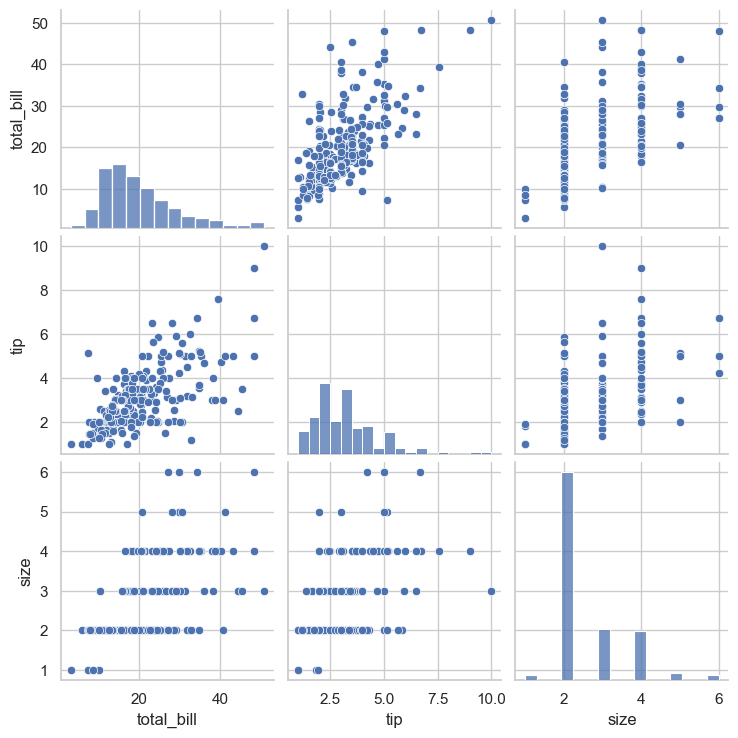

In [5]:
sns.pairplot(df)

I would use :
- for total_bill : a Gaussian distributtion (continous variable)
- for tip : a Gaussian distribution (continous variable)
- for sex : a Bernouilli distribution (binary feature : either "male" or "female")
- for smoker : a Bernouilli distribution (binary feature: either "yes" or "no")
- for day : a multinomial distribution (categorical feature, choice between : "Thu", "Fri", "Sat", "Sun")
- for time : a Bernouilli distribution (binary feature : either "lunch" or "dinner")
- for size : a Binomial distribution (counter feature : "size" counts how many people were in the table served) (Poisson can also be used)

For total_bill and tip, there appears to be only one peak, so we can use simple Gaussian distributions.

# 3. Naïve Bayes Classification

Let's write a Naïve Bayes classifier from scratch. We will work with the `iris` dataset (again, from Seaborn) since we know already the data. All features are continuous: for simplicity we can use simple Gaussians, but we should expect some misclassification.

From now on let's also introduce the train-test split so we can start verifying our model's performance the right way. Just use `train` for your answer instead of `df`, and leave `test` for the end.

In [6]:
df = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2) # 80-20 split

#### 3.1 **[2pt]** Compute the priors for the three classes of the Iris dataset using the Pandas DataFrame, _in a single line of code_ and without using loops (`for`, `while`, etc.).

One-liners are typically bad practice (remember: readability first!), but here I need to force you to learn this new tool and stop writing `for` loops, since they will not scale from now on.  

Careful as many tutorials online (such as [this one](https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/) will explicitly select the class and run the same calculation multiple times (and in multiple lines). This approach **does not scale** to problems with 100 or 10'000 classes: learn to use `groupby()` instead!  
_[Think: this course should make you confident enough to be the one writing the tutorials, and hopefully of much better quality!]_

As a reference, you will need to (i) group the dataframe by species, (ii) select only the grouped elements (returning a Series), (iii) run the Numpy-backed `count()`, (iv) divide by the total number of elements. If you get lost on the `groupby`, try this: `groupby(feature_name)[feature_name]`.

And yes it's not a problem to add a print statement in a second line :)

In [7]:
priors = train.groupby("species")["species"].count() / train["species"].count()
priors

species
setosa        0.358333
versicolor    0.300000
virginica     0.341667
Name: species, dtype: float64

#### 3.2 **[1pt]** Compute the means and the standard deviations for each feature and for each class of the Iris dataset using the Pandas DataFrame (one line of code each).

As a reference, you should obtain 12 means and 12 standard deviations. Again, the use of `groupby` followed by Numpy's functions will take literally 2 lines and no loops. Remember to use the `train` data!

In [8]:
means = train.groupby("species").mean()
means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.986047,3.446512,1.479070,0.246512
versicolor,5.997222,2.811111,4.366667,1.358333
virginica,6.668293,2.990244,5.607317,2.043902


In [9]:
stds = train.groupby("species").std()
stds 

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.321145,0.350067,0.176687,0.109868
versicolor,0.472372,0.296434,0.404969,0.197665
virginica,0.580706,0.343369,0.555153,0.280222


Here is a freebie to save you some debugging time: the (stunted) equation for the Gaussian probability. Stunted in the sense that, since it is only used to maximize the class probability, parts that do not depend on the class have been dropped (as usual). It requires you to define first the variables `means` and `stds` from the previous question (both $(3\times4)$ DataFrames).

If you really want to understand what is going on (especially with Pandas), I challenge you to comment it out, pull the slides, and write your own. You did something very close for LDA, feel free to review your code. You don't need it to look identical as long as it does the same job.

Remember that Naïve Bayes computes the class likelihood as a product of the independent probabilities for each feature: this is done by the `product()` on the columns. If you remove that, you should have 12 values (give it a try).

When passing a line of input to `likelihood` be careful to remove the last column (the `species`) as in the example below (in our previous calculations this was done by the `groupby()`, which made a new dimension out of it).

Also something that can be important: sometimes `iloc[]` converts the type of the data slice, so you can have errors because a function cannot be broadcasted. In that case, remember that calling `.astype('float')` will force the dtype to `float` and address some of these errors. This is not the most elegant solution, I will leave it to you to find a better one ;)

In [10]:
# What do you think of the style of this Gaussian one-liner?
likelihood = lambda x: (np.exp(-(x-means)**2/(2*stds**2))/stds).product(axis=1)
likelihood(train.iloc[0, :-1].astype('float'))

species
setosa        1.315706e+02
versicolor    1.071495e-20
virginica     2.874066e-24
dtype: float64

#### 3.3 **[1pt]** Write a Python function that takes a single line of input $x$ and returns the prediction of its class $\hat{y}$. Run it on the same data point as the example cell above. Is the prediction the same as you would have from the cell above? Why / why not?

As a sanity check: it should take a row as input (without labels, as for `likelihood` above) and return the string found in the `index` of the max value (the documentation is your friend).

In [11]:
def prediction(x):
    y_hat = (priors*likelihood(x)).idxmax() # using the Bayes rule (more precisely the approximation, where we do not use the evidence)
    return(y_hat)
    
y_hat = prediction(train.iloc[0, :-1].astype('float'))
print(y_hat)

setosa


The prediction is the same in our example here. However, it might not always be the case because the cell above only takes into consideration the likelihood whereas this current prediction takes into account both the priors and the likelihood (it multipies the first with the latter).

#### 3.4 **[2pt]** Compute $\hat{y}$ for all points in the `test` dataset, in one line and without using Python loops (`for`, `while`, etc.). Compare it with the correct label $y$ and print the number of misclassified points.

And here is how you use the test set: after the training on the train set is complete, you evaluate its performance on data it was not trained on. This is absolutely **crucial** in machine learning. We will use this process from now on, and using the wrong dataset (either for training or testing) will be considered a major error (so careful with typos! Double-check every time!). If you wonder why so strict, check again the 4th lecture and ask yourself what are the consequences of getting it wrong in a work or research setting (and feel free to discuss on Moodle).

Again, no loops: you need both to drop the last column and then to apply the function to the rows. For example: `train.iloc[:, :-1].apply(my_predict_fn, axis=1)`. Can you make it look nicer/more readable?

Remember you can count the number of `True` values in a numpy array simply by calling `sum()` on it.

In [12]:
y_hats = train.iloc[:, :-1].apply(prediction, axis =1)
true_species = train.iloc[:, -1]
wrong_predictions_count = sum(y_hats != true_species)

print("Number of wrong predictions:", wrong_predictions_count)


Number of wrong predictions: 4


#### 3.5 **[1pt]** Why did we not compute (nor need) the _evidence_ for predicting the input's class?

Because the Naive Bayes maximize the probability $P(y \,|\, x)$ in regards to $y$ (as we saw previously) and therefore, the evidence $P(x)$, which depends only on $x$, can be dropped. In fact, when we maximize an expression in regards to a variable, the terms of that expression that do not depend on the variable can be dropped.

#### 3.6 **[2pt]** Train a scikit-learn Naïve Bayes Gaussian classifier on the Iris train data using a Pandas Dataframe, and print the number of misclassified points on the test data.

Remember that:
- Now that we have a bit more experience with Pandas we can learn how to pass the DataFrames directly to scikit-learn.
- The training data should always be 2D (i.e. DataFrame) and not have the label (`train.iloc[:,:-1]`, do you know what each `:` stands for?).
- The labels should always be 1D (i.e. Series) and numerical. Rather than doing the conversion manually, you should convert the feature to categorical and then use its codes (`train['species'].astype('category').cat.codes`).
- Mistakenly testing on the train set will fail the question, as will comparing the prediction against the train set labels (hint hint).
- You will probably get better results with scikit-learn because it uses multivariate Gaussians and improved estimators (check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [13]:
from sklearn.naive_bayes import GaussianNB

X = train.drop(columns = "species") 
Y = train['species'].astype('category').cat.codes
X_test = test.drop(columns="species")   
Y_test = test['species'].astype('category').cat.codes

trained = GaussianNB()
trained.fit(X, Y)

y_hats_test = trained.predict(X_test) #we test the model now with the X_test (and not on the trained!)
wrong_predictions_scikit = sum( y_hats_test != Y_test ) 

print(wrong_predictions_scikit)

1


# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Do a bit of independent research, and propose below the simplest example you can, to make evident how the frequentist and Bayesian approaches are different.

I advise against blind copy+paste from the Internet in this case, I have seen so many incorrect opinions and tutorials over the years it is frankly ridiculous. I suggest you rather argue a bit on the Moodle about the approaches themselves, so you can make sure your example is correct.

A good intro: [[link]](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf).

#### BONUS **[ZERO pt]** Train a Gaussian NB (either your code or scikit-learn) on the full Iris dataset (no train-test split) and check the misclassifications. Train the same on the 80% training data, then check and aggregate misclassifications both on the train and test datasets. You will probably get the same number of total errors regardless of whether you trained on 80% or 100% of the data. Can you explain why? The reason was mentioned in the last lecture. Feel free to play with different splits until you find how low can you go with the training before increasing the number of errors. Use the term `statistically representative` in your explanation.

### Final considerations

- This is the first core ML method we are covering in the course. As you see you need to know quite a few concepts before we can really discuss its inner workings.
- On the other hand, you now already own most of the glossary and knowledge needed, so you only need to put it all together. The rest of the course will follow this same pattern.
- This is also your first method capable of *nonlinear classification*. Notice how LDA used nonlinear models for the data (Gaussian clusters) but still relied on linear separation boundaries (weirdly obtaining $m$ and $q$ from class-pair inequalities)? NB can work with multiple classes and different types of distributions (think Mixture of Gaussians), the division boundary is not (necessarily) a line anymore.
- In the next two lectures we will start learning about one of the bigger classic ML tools still state-of-the-art today: the Support Vector Machine, and the Kernel Trick. We are reaching the "cruise speed" level of complexity for the course, we will stay close to this level until the exam. Keep up with the lectures and exercises and you should have no trouble. Good luck!